code from: https://darribas.org/gds_course/content/bF/lab_F.html#spatial-autocorrelation-and-exploratory-spatial-data-analysis

In [2]:
import seaborn as sns
import pandas as pd
import esda
from pysal.lib import weights
from splot.esda import (
    moran_scatterplot, lisa_cluster, plot_local_autocorrelation
)
import geopandas as gpd
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt

In [3]:
are = gpd.read_file("are_mean_median_kontur_corpo_non_corpo_combi_withMeta.geojson")

idn = gpd.read_file("idn_mean_median_kontur_corpo_non_corpo_combi_withMeta_v2.geojson")
col = gpd.read_file("col_mean_median_kontur_corpo_non_corpo_combi_with_meta_v2.geojson")

### the UAE

In [3]:
are = are.set_index('name', drop = False)

In [4]:
are = are.dropna()

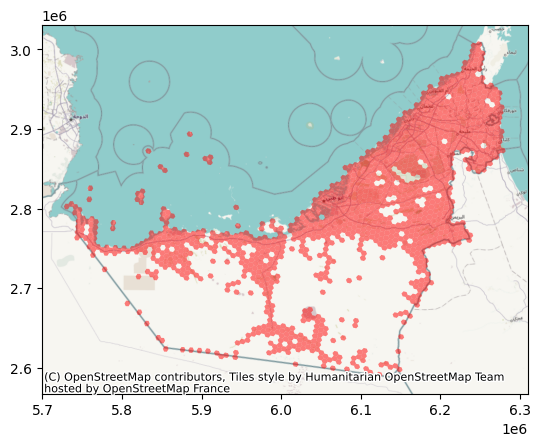

In [5]:
ax = are.plot(alpha=0.5, color='red');
# Add background map, expressing target CRS so the basemap can be
# reprojected (warped)
ctx.add_basemap(ax, crs=are.crs)

In [6]:
# Create the spatial weights matrix
%time w = weights.Queen.from_dataframe(are, idVariable="name")

CPU times: total: 78.1 ms
Wall time: 122 ms


<timed exec>:1: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.
C:\Users\Lilly\anaconda3\envs\ba3\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 54 disconnected components.
 There are 37 islands with ids: 86438415fffffff, 864384507ffffff, 8643a04e7ffffff, 8643a0da7ffffff, 8643a2667ffffff, 8643a3017ffffff, 8643a46d7ffffff, 8643a4b1fffffff, 8643a605fffffff, 8643a60a7ffffff, 8643b1a1fffffff, 8643b1acfffffff, 8643b589fffffff, 8643b58b7ffffff, 8643b5997ffffff, 865349127ffffff, 865349157ffffff, 865349237ffffff, 865349267ffffff, 865349d4fffffff, 86534d787ffffff, 86536b68fffffff, 864384017ffffff, 864384aa7ffffff, 8643a2337ffffff, 8643a26a7ffffff, 8643a26f7ffffff, 8643a3527ffffff, 8643a3c97ffffff, 8643a4167ffffff, 8643a49a7ffffff, 8643a602fffffff, 8643a6637ffffff, 8643a66e7ffffff, 8643b195fffffff, 865349937ffffff, 86534dd07ffffff.
  warnings.warn(message)


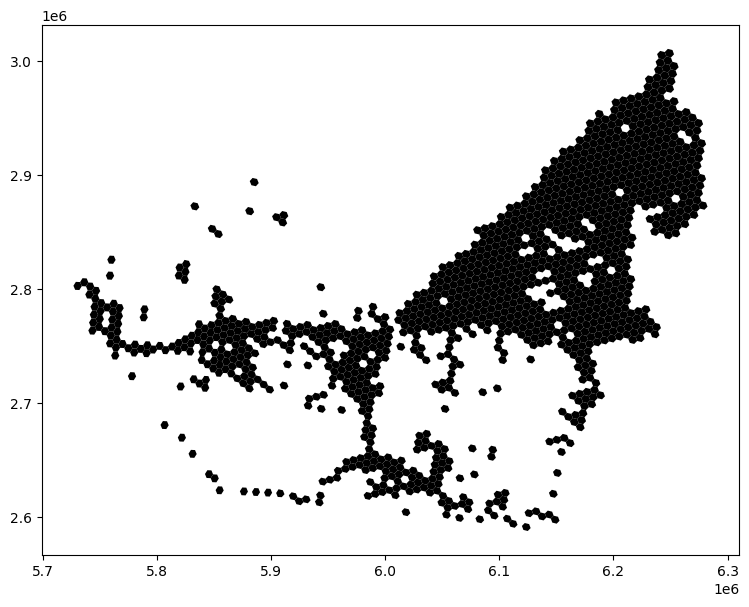

In [7]:
ax = are.plot(color='k', figsize=(9, 9))
#are.loc[w.islands, :].plot(color='red', ax=ax);

In [8]:
are = are.drop(w.islands)

In [9]:
# Create the spatial weights matrix
%time w = weights.Queen.from_dataframe(are, idVariable="name")


CPU times: total: 78.1 ms
Wall time: 101 ms


<timed exec>:1: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.
C:\Users\Lilly\anaconda3\envs\ba3\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 17 disconnected components.
  warnings.warn(message)


In [10]:
w.transform = 'R'

In [12]:
are['mean_difference'] = weights.lag_spatial(w, are['diff_non_corpo'])

In [13]:
are['mean_diff_std'] = (
    are['diff_non_corpo'] - are['diff_non_corpo'].mean()
) / are['diff_non_corpo'].std()

In [14]:
are['w_mean_diff_std'] = weights.lag_spatial(w, are['mean_diff_std'])

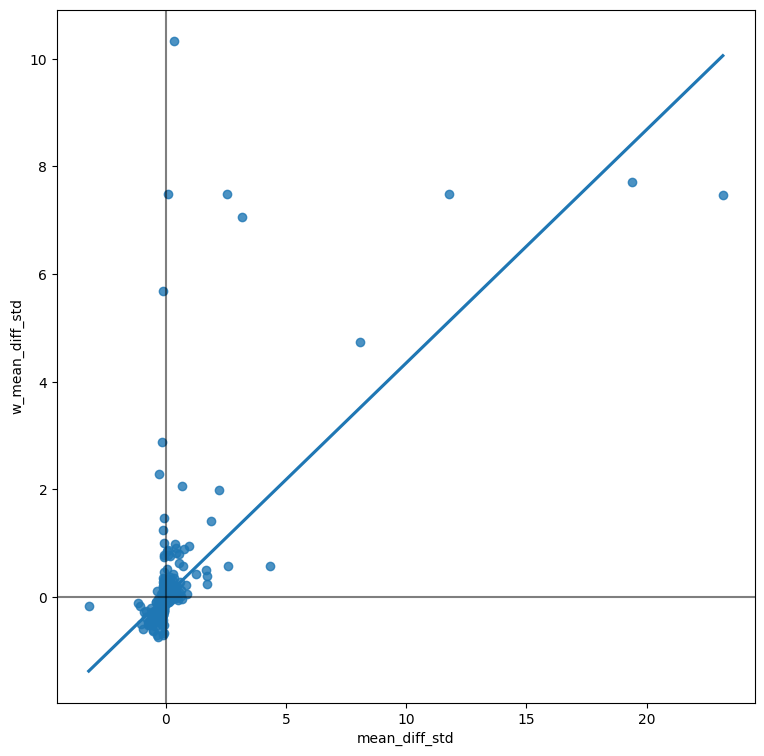

In [15]:
# Morans Plot

# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x='mean_diff_std', y='w_mean_diff_std', data=are, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Display
plt.show()

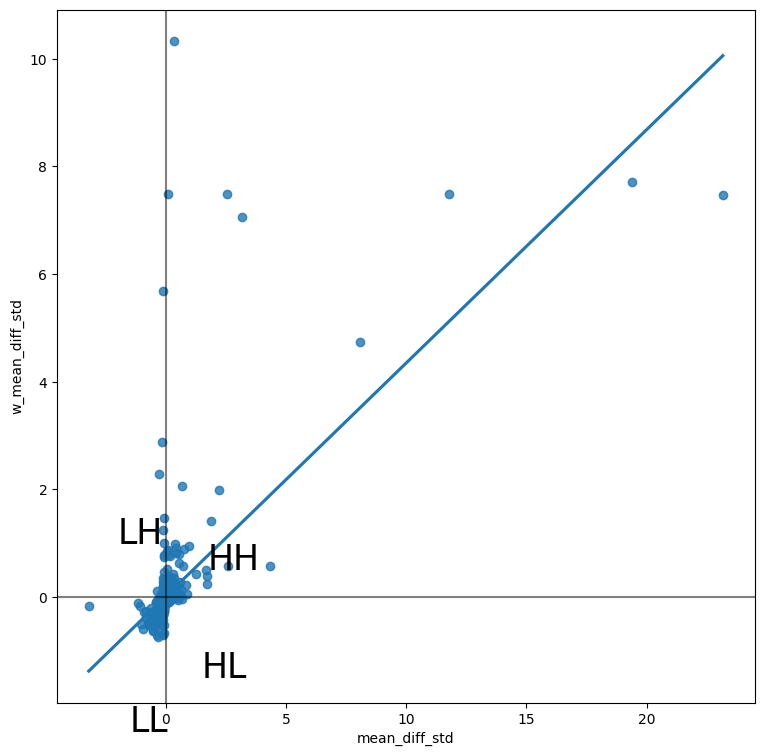

In [16]:
#visualisaiton of Local Indicators of Spatial Association 

# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x='mean_diff_std', y='w_mean_diff_std', data=are, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
plt.text(1.75, 0.5, "HH", fontsize=25)
plt.text(1.5, -1.5, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1.5, -2.5, "LL", fontsize=25)
# Display
plt.show()

In [17]:
lisa = esda.Moran_Local(are['diff_non_corpo'], w)

In [18]:
# Break observations into significant or not
are['significant'] = lisa.p_sim < 0.05
# Store the quadrant they belong to
are['quadrant'] = lisa.q

In [19]:
are['quadrant'].head()

name
864384547ffffff    3
864384567ffffff    3
864384a07ffffff    3
864384a1fffffff    3
864384a47ffffff    3
Name: quadrant, dtype: int32

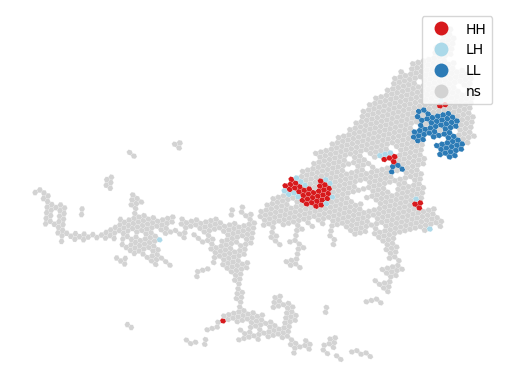

In [20]:
lisa_cluster(lisa, are);

In [21]:
are_gdf = gpd.GeoDataFrame(are, geometry = 'geometry')

In [22]:
are_gdf = are_gdf.rename(columns={'name': 'name2'})
are_gdf = are_gdf.reset_index()

In [23]:
are_gdf = are_gdf.drop(columns={'name2'})

In [24]:
are_gdf.to_file("are_mean_median_with_LISA_non_corporate_withMeta.geojson", driver='GeoJSON')

## Colombia

In [4]:
col = col.set_index('name', drop = False)

In [5]:
col = col.dropna()

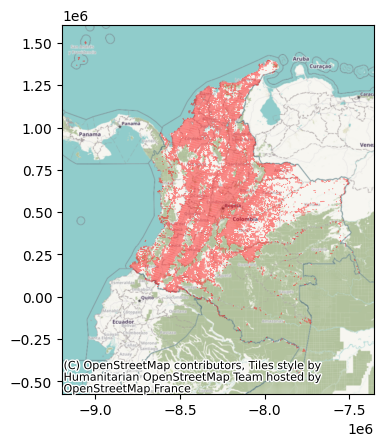

In [6]:
ax = col.plot(alpha=0.5, color='red');
# Add background map, expressing target CRS so the basemap can be
# reprojected (warped)
ctx.add_basemap(ax, crs=col.crs)

In [7]:
# Create the spatial weights matrix
%time w = weights.Queen.from_dataframe(col, idVariable="name")

<timed exec>:1: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.


CPU times: total: 2.34 s
Wall time: 3.4 s


C:\Users\Lilly\anaconda3\envs\ba3\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 372 disconnected components.
 There are 220 islands with ids: 86661850fffffff, 866618987ffffff, 866618cc7ffffff, 86661a0dfffffff, 86661a6f7ffffff, 86661a747ffffff, 8666c38cfffffff, 8666c4357ffffff, 8666c534fffffff, 8666c892fffffff, 8666cc49fffffff, 8666cd56fffffff, 8666ce06fffffff, 8666cec8fffffff, 8666e8ad7ffffff, 8666e9b1fffffff, 8666ee6dfffffff, 8666f031fffffff, 8666f319fffffff, 8666f434fffffff, 8666f4737ffffff, 8666f556fffffff, 8667562a7ffffff, 868a458d7ffffff, 868a4996fffffff, 868a4b2cfffffff, 868a4bbb7ffffff, 868a4c817ffffff, 868a4c887ffffff, 868a6b58fffffff, 86675672fffffff, 86661168fffffff, 8666402d7ffffff, 86664b9b7ffffff, 8666523afffffff, 866654b27ffffff, 86665dccfffffff, 8666707a7ffffff, 866672247ffffff, 866673c9fffffff, 8666c194fffffff, 8666c4337ffffff, 8666ccc9fffffff, 8666e80afffffff, 8666ec26fffffff, 8667568efffffff, 868

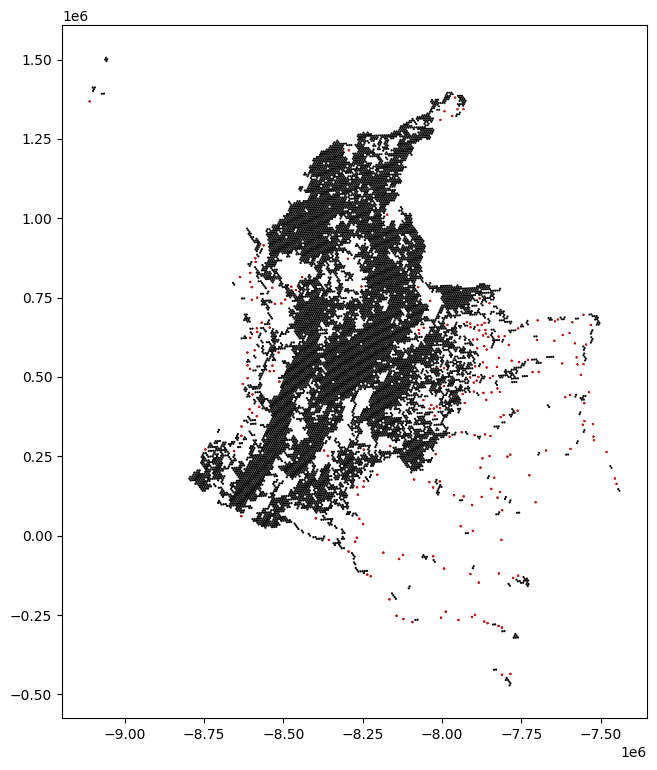

In [8]:
ax = col.plot(color='k', figsize=(9, 9))
col.loc[w.islands, :].plot(color='red', ax=ax);

In [9]:
col = col.drop(w.islands)

In [10]:
# Create the spatial weights matrix
%time w = weights.Queen.from_dataframe(col, idVariable="name")


<timed exec>:1: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.


CPU times: total: 2.19 s
Wall time: 3.42 s


C:\Users\Lilly\anaconda3\envs\ba3\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 152 disconnected components.
  warnings.warn(message)


In [11]:
w.transform = 'R'

In [12]:
col['mean_difference'] = weights.lag_spatial(w, col['diff_non_corpo'])

In [13]:
col

,name,t0_nc_median,t1_nc_median,t0_c_median,t1_c_median,t0_nc_mean,t1_nc_mean,t0_c_mean,t1_c_mean,diff_corpo,diff_non_corpo,fid,population,geometry,mean_difference
name,,,,,,,,,,,,,,,
866600037ffffff,866600037ffffff,5.0,0.0,0.0,2.0,5.0,0.000000,0.000000,2.0,2.000000,-5.000000,740324.0,16.0,"POLYGON ((-8334651.638 1013114.061, -8331155.5...",-33.000000
86660004fffffff,86660004fffffff,0.0,0.0,2.0,0.0,0.0,0.000000,2.000000,0.0,-2.000000,0.000000,740322.0,1512.0,"POLYGON ((-8312502.518 992040.835, -8309007.22...",-4.833333
866600077ffffff,866600077ffffff,1.0,1.0,11.0,106.0,1.0,1.000000,11.000000,106.0,95.000000,0.000000,740318.0,284.0,"POLYGON ((-8320277.408 1002735.814, -8316782.1...",1.000000
866600087ffffff,866600087ffffff,19.0,1.0,45.0,1.0,19.0,1.000000,45.000000,1.0,-44.000000,-18.000000,740317.0,631.0,"POLYGON ((-8346692.874 1001485.051, -8343194.0...",2.333333
866600097ffffff,866600097ffffff,0.0,2.0,2.0,4.0,0.0,4.000000,57.333333,4.0,-53.333333,4.000000,740315.0,6744.0,"POLYGON ((-8353302.569 1001169.412, -8349802.8...",-2.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8666dc8b7ffffff,8666dc8b7ffffff,0.0,0.0,0.0,2.0,0.0,0.000000,0.000000,2.0,2.000000,0.000000,719507.0,227.0,"POLYGON ((-8535924.851 30646.245, -8532307.584...",0.083333
8666e4137ffffff,8666e4137ffffff,0.0,1.0,0.0,2.0,0.0,1.000000,0.000000,2.0,2.000000,1.000000,718015.0,632.0,"POLYGON ((-8264225.078 601572.146, -8260697.27...",0.683333
8666ee54fffffff,8666ee54fffffff,0.0,5.0,0.0,1.0,0.0,5.000000,0.000000,1.0,1.000000,5.000000,716447.0,47.0,"POLYGON ((-8207718.297 259719.990, -8204164.75...",-2.694444


In [14]:
col['mean_diff_std'] = (
    col['diff_non_corpo'] - col['diff_non_corpo'].mean()
) / col['diff_non_corpo'].std()

In [15]:
col['w_mean_diff_std'] = weights.lag_spatial(w, col['mean_diff_std'])

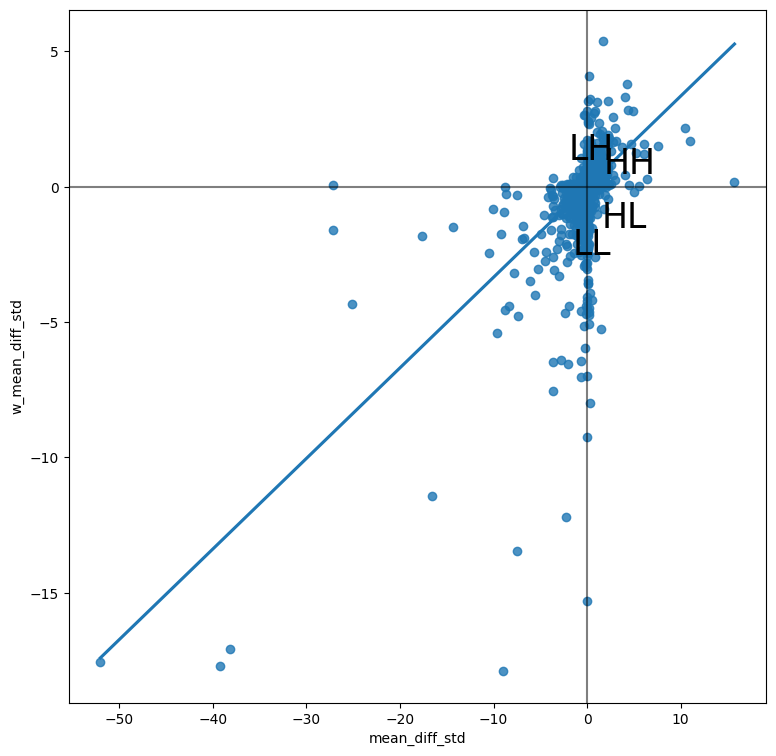

In [16]:
#visualisaiton of Local Indicators of Spatial Association 

# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x='mean_diff_std', y='w_mean_diff_std', data=col, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
plt.text(1.75, 0.5, "HH", fontsize=25)
plt.text(1.5, -1.5, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1.5, -2.5, "LL", fontsize=25)
# Display
plt.show()

In [17]:
lisa = esda.Moran_Local(col['diff_non_corpo'], w)

In [18]:
# Break observations into significant or not
col['significant'] = lisa.p_sim < 0.05
# Store the quadrant they belong to
col['quadrant'] = lisa.q

In [19]:
col['quadrant'].head()

name
866600037ffffff    4
86660004fffffff    1
866600077ffffff    1
866600087ffffff    2
866600097ffffff    1
Name: quadrant, dtype: int32

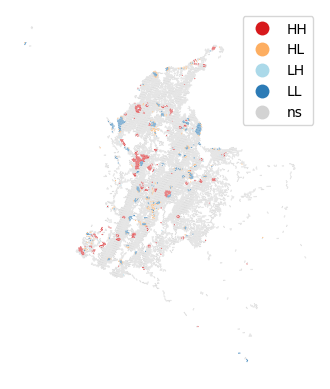

In [20]:
lisa_cluster(lisa, col);

In [21]:
col_gdf = gpd.GeoDataFrame(col, geometry = 'geometry')

In [22]:
col_gdf = col_gdf.rename(columns={'name': 'name2'})
col_gdf = col_gdf.reset_index()

In [23]:
col_gdf = col_gdf.drop(columns={'name2'})

In [24]:
col_gdf.to_file("col_mean_median_with_LISA_non-corporate_withMeta.geojson", driver='GeoJSON')

## Indonesia

In [25]:
idn = idn.set_index('name', drop = False)

In [26]:
idn = idn.dropna()

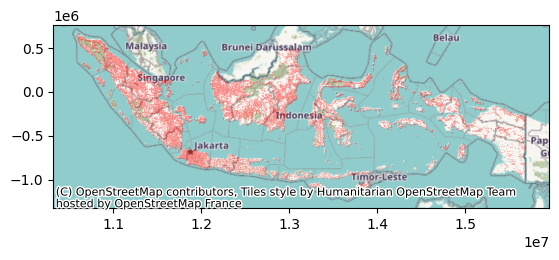

In [27]:
ax = idn.plot(alpha=0.5, color='red');
# Add background map, expressing target CRS so the basemap can be
# reprojected (warped)
ctx.add_basemap(ax, crs=idn.crs)

In [28]:
# Create the spatial weights matrix
%time w = weights.Queen.from_dataframe(idn, idVariable="name")

<timed exec>:1: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.


CPU times: total: 3.75 s
Wall time: 7.54 s


C:\Users\Lilly\anaconda3\envs\ba3\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 1862 disconnected components.
 There are 816 islands with ids: 866520b8fffffff, 866521507ffffff, 8665268e7ffffff, 86652d127ffffff, 86652dc07ffffff, 86652dd17ffffff, 866556207ffffff, 86657299fffffff, 866813707ffffff, 866880457ffffff, 866881c47ffffff, 866881cd7ffffff, 866882977ffffff, 866883c4fffffff, 866885247ffffff, 86688eccfffffff, 866891107ffffff, 866891aafffffff, 86689202fffffff, 86689346fffffff, 866893587ffffff, 866893d07ffffff, 86689458fffffff, 866529c37ffffff, 866880027ffffff, 86688516fffffff, 866893847ffffff, 86689a417ffffff, 868cd64a7ffffff, 868cd86b7ffffff, 868cd8cefffffff, 868cd8d17ffffff, 868cda307ffffff, 868cdaa8fffffff, 868cdaae7ffffff, 868cdc00fffffff, 868cdc09fffffff, 868cdc2a7ffffff, 868cdc937ffffff, 868cf085fffffff, 868cf0aafffffff, 868cf22efffffff, 868cf25afffffff, 868cf271fffffff, 868cf276fffffff, 868cf2997ffffff, 86

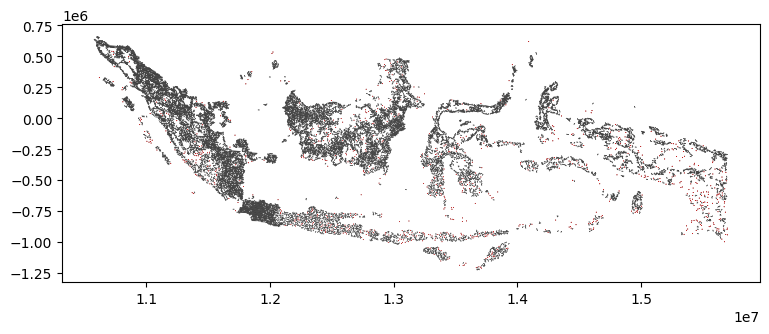

In [29]:
ax = idn.plot(color='k', figsize=(9, 9))
idn.loc[w.islands, :].plot(color='red', ax=ax);

In [30]:
idn = idn.drop(w.islands)

In [31]:
# Create the spatial weights matrix
%time w = weights.Queen.from_dataframe(idn, idVariable="name")


<timed exec>:1: FutureWarning: `idVariable` is deprecated and will be removed in future. Use `ids` instead.


CPU times: total: 3.91 s
Wall time: 5.96 s


C:\Users\Lilly\anaconda3\envs\ba3\Lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 1046 disconnected components.
  warnings.warn(message)


In [32]:
w.transform = 'R'

In [33]:
idn['mean_difference'] = weights.lag_spatial(w, idn['diff_non_corpo'])

In [34]:
idn['mean_diff_std'] = (
    idn['diff_non_corpo'] - idn['diff_non_corpo'].mean()
) / idn['diff_non_corpo'].std()

In [35]:
idn['w_mean_diff_std'] = weights.lag_spatial(w, idn['mean_diff_std'])

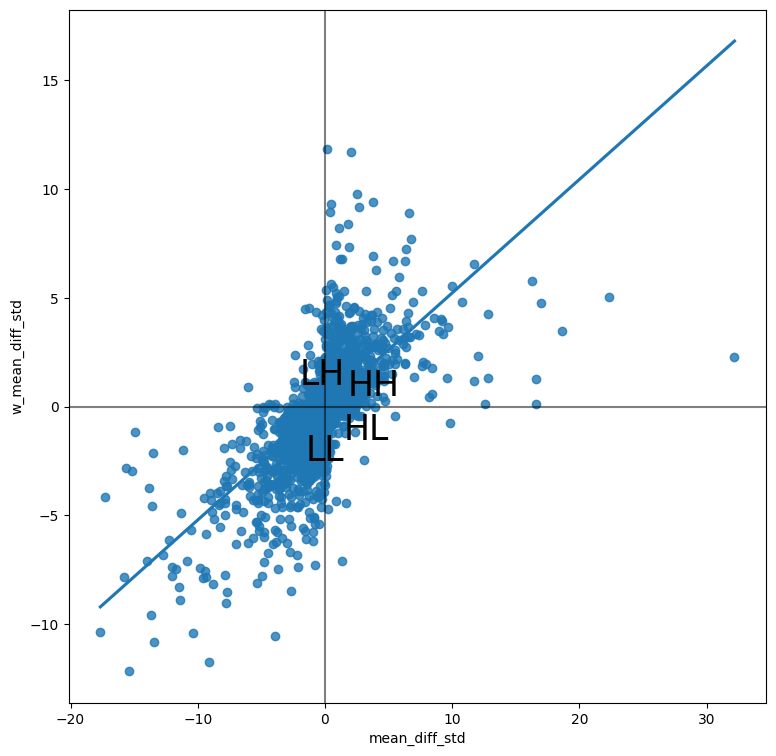

In [36]:
#visualisaiton of Local Indicators of Spatial Association 

# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x='mean_diff_std', y='w_mean_diff_std', data=idn, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
plt.text(1.75, 0.5, "HH", fontsize=25)
plt.text(1.5, -1.5, "HL", fontsize=25)
plt.text(-2, 1, "LH", fontsize=25)
plt.text(-1.5, -2.5, "LL", fontsize=25)
# Display
plt.show()

In [37]:
lisa = esda.Moran_Local(idn['diff_non_corpo'], w)

In [38]:
# Break observations into significant or not
idn['significant'] = lisa.p_sim < 0.05
# Store the quadrant they belong to
idn['quadrant'] = lisa.q

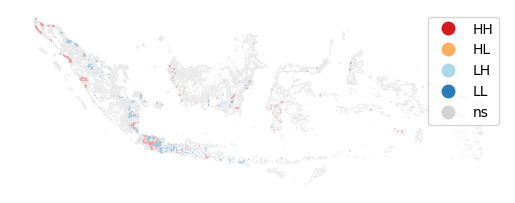

In [39]:
lisa_cluster(lisa, idn);

In [40]:
idn_gdf = gpd.GeoDataFrame(idn, geometry = 'geometry')

In [41]:
idn_gdf = idn_gdf.rename(columns={'name': 'name2'})
idn_gdf = idn_gdf.reset_index()

In [42]:
idn_gdf = idn_gdf.drop(columns={'name2'})

In [43]:
idn_gdf.to_file("idn_mean_median_with_LISA_non-corporate_withMeta.geojson", driver='GeoJSON')